Boston House Prices dataset
===========================

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
http://archive.ics.uci.edu/ml/datasets/Housing


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
**References**

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
   - many more! (see http://archive.ics.uci.edu/ml/datasets/Housing)


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set(rc={'figure.figsize': (14, 14,)})
plt.style.use('seaborn-white')
dataset = load_boston()
df = pd.DataFrame(data=np.c_[dataset.data, dataset.target], columns=list(dataset.feature_names) + ['MEDV'])

### Visualization

In [2]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


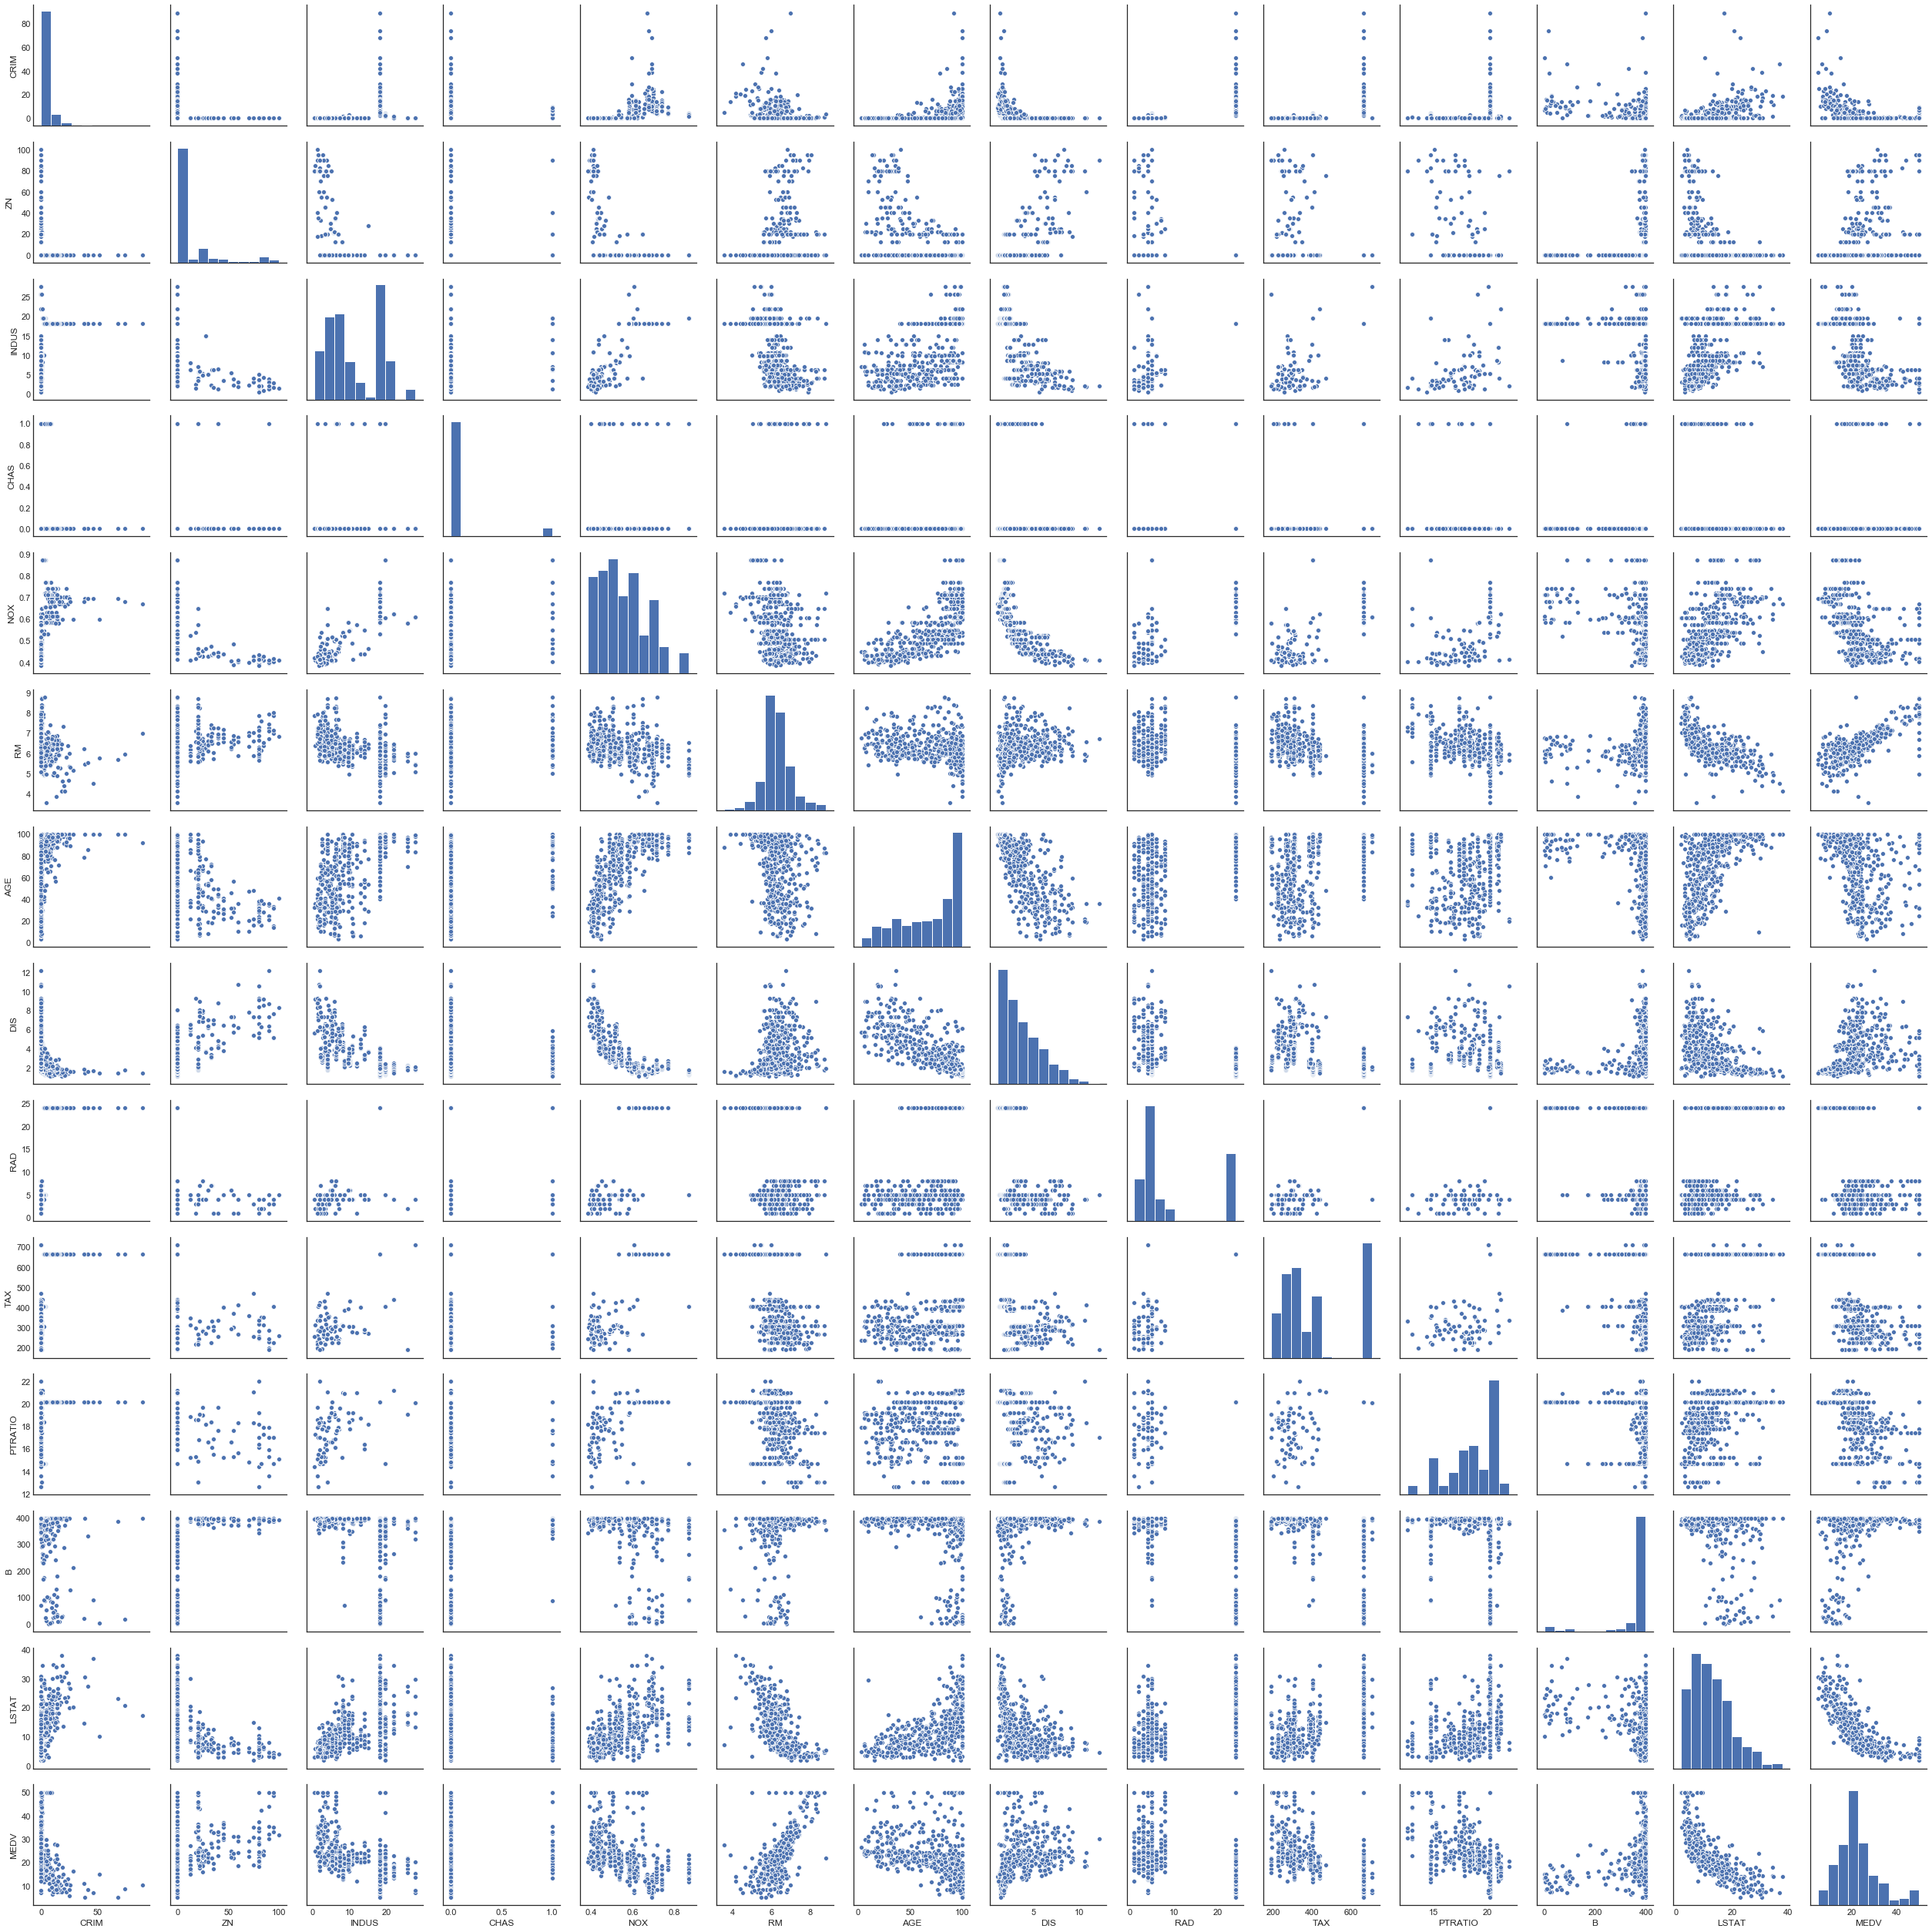

In [3]:
sns.pairplot(df);

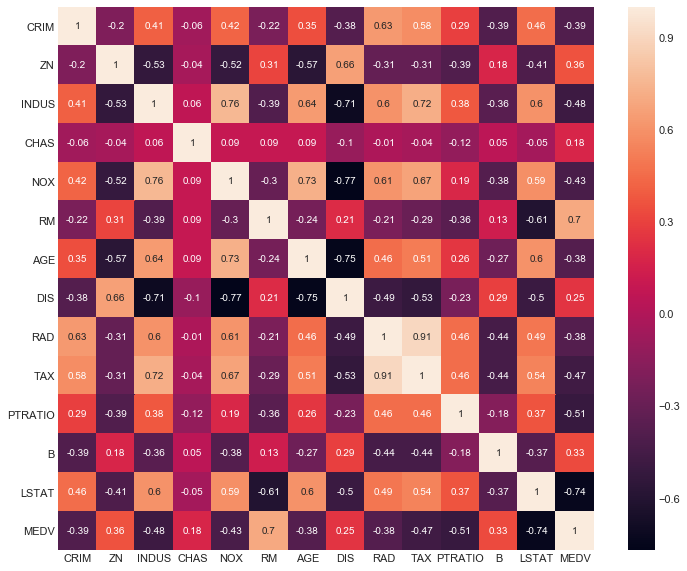

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr().round(2), annot=True);

### Choose the dependent and independent variables

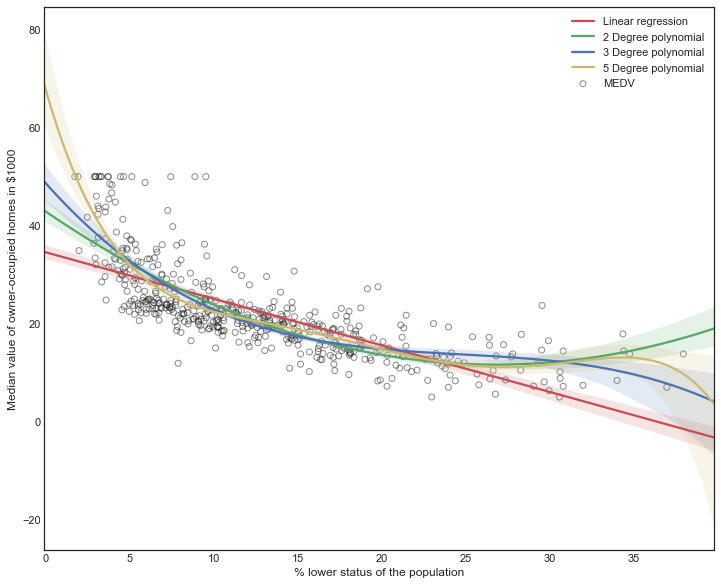

In [5]:
plt.figure(figsize=(12, 10))
plt.scatter(df['LSTAT'], df['MEDV'], facecolors='None', edgecolors='k', alpha=.5)

sns.regplot(df['LSTAT'], df['MEDV'], label='Linear regression', scatter=False, color='r')
sns.regplot(df['LSTAT'], df['MEDV'], label='2 Degree polynomial', scatter=False, order=2, color='g')
sns.regplot(df['LSTAT'], df['MEDV'], label='3 Degree polynomial', scatter=False, order=3, color='b')
sns.regplot(df['LSTAT'], df['MEDV'], label='5 Degree polynomial', scatter=False, order=5, color='y')

plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000')
plt.legend();

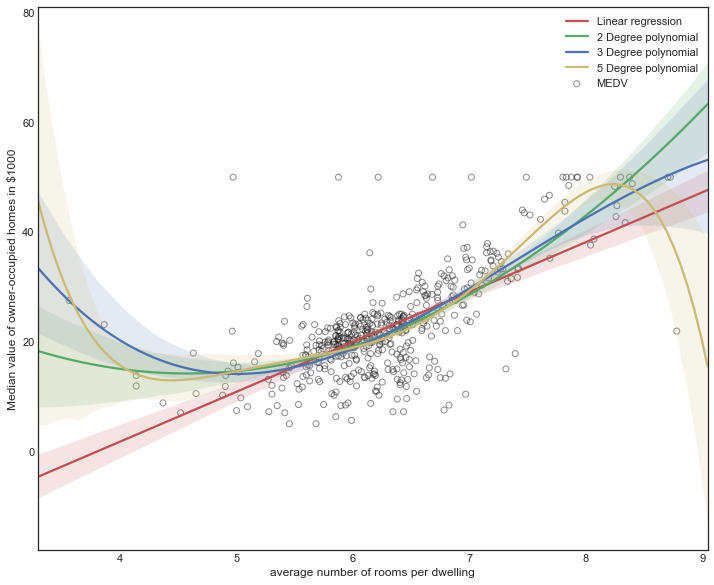

In [6]:
plt.figure(figsize=(12, 10))
plt.scatter(df['RM'], df['MEDV'], facecolors='None', edgecolors='k', alpha=.5)

sns.regplot(df['RM'], df['MEDV'], label='Linear regression', scatter=False, color='r')
sns.regplot(df['RM'], df['MEDV'], label='2 Degree polynomial', scatter=False, order=2, color='g')
sns.regplot(df['RM'], df['MEDV'], label='3 Degree polynomial', scatter=False, order=3, color='b')
sns.regplot(df['RM'], df['MEDV'], label='5 Degree polynomial', scatter=False, order=5, color='y')

plt.xlabel('average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000')
plt.legend();

Text(0.5, 0, 'Median value of owner-occupied homes in $1000')

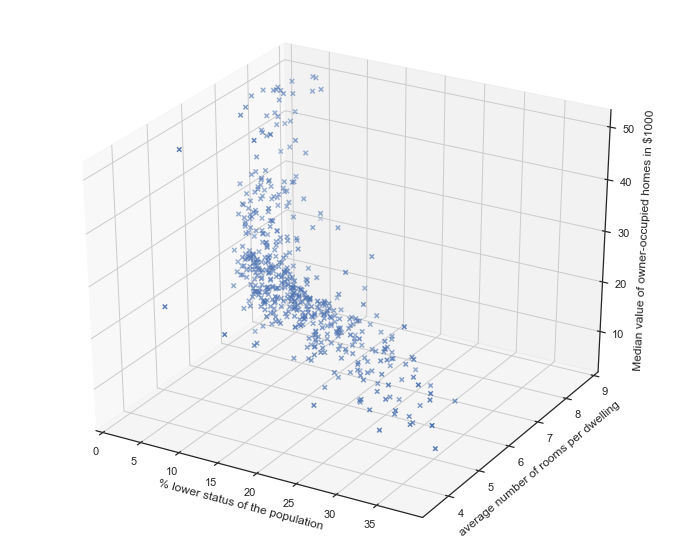

In [7]:
ax = plt.figure(figsize=(12, 10)).add_subplot(111, projection='3d')
ax.scatter(df['LSTAT'], df['RM'], df['MEDV'], marker='x');
ax.set_xlabel('% lower status of the population')
ax.set_ylabel('average number of rooms per dwelling')
ax.set_zlabel('Median value of owner-occupied homes in $1000')

In [8]:
X, y = np.c_[df['LSTAT'].values, df['RM'].values], df['MEDV'].values

### Preprocessing

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=2)

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1,1))

df.loc[:, ['LSTAT', 'RM', 'MEDV']].head()

,LSTAT,RM,MEDV
0,4.98,6.575,24.0
1,9.14,6.421,21.6
2,4.03,7.185,34.7
3,2.94,6.998,33.4
4,5.33,7.147,36.2


### Finding the right model

In [10]:
from sklearn.neural_network import MLPRegressor

nnmodel = MLPRegressor(max_iter=100, hidden_layer_sizes=[50], alpha=0, random_state=20, learning_rate_init=0.1)
nnmodel.fit(X_train_scaled, y_train_scaled.ravel())

print('Score on train set:', nnmodel.score(X_train_scaled, y_train_scaled.ravel()))
print('Score on test set:', nnmodel.score(X_test_scaled, y_test_scaled.ravel()))

Score on train set: 0.727918365612967
Score on test set: 0.8334048091253731


In [11]:
from sklearn.linear_model import LinearRegression

lrmodel = LinearRegression()
lrmodel.fit(X_train_scaled, y_train_scaled)
print('Accuracy on train:', lrmodel.score(X_train_scaled, y_train_scaled))
print('Accuracy on test:', lrmodel.score(X_test_scaled, y_test_scaled))

Accuracy on train: 0.6387198914531032
Accuracy on test: 0.6289093051534689


### Visualize

Text(0.5, 0.92, 'Prediction plane')

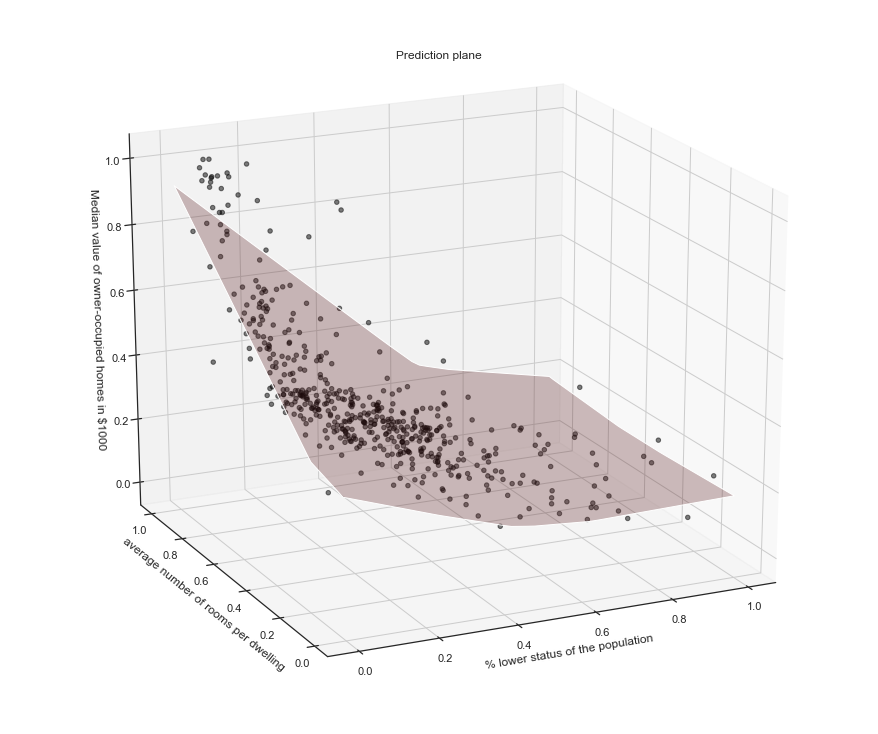

In [12]:
_X, _y = X_scaler.transform(X), y_scaler.transform(y.reshape(-1, 1))

# create a grid
xx_ = np.arange(_X[:, 0].min(), _X[:, 0].max(), .02)
yy_ = np.arange(_X[:, 1].min(), _X[:, 1].max(), .02)
xx, yy = np.meshgrid(xx_, yy_)

Z = nnmodel.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

fig = plt.figure(figsize=(12, 10))
ax = Axes3D(fig)
ax.view_init(21, -115)

ax.plot_surface(xx, yy, Z, rstride=50, cstride=50, alpha=0.3, color='r')
ax.scatter3D(_X[:, 0], _X[:, 1], _y, color='black', alpha=0.5)

ax.set_xlabel('% lower status of the population')
ax.set_ylabel('average number of rooms per dwelling')
ax.set_zlabel('Median value of owner-occupied homes in $1000')

ax.set_title('Prediction plane')